# Document-Term Matrices

...

## What is a document-term matrix?

* D1 = "I like this class"
* D2 = "I love this class"

Then the document-term matrix would be:

|x|I|like|love|this|class|
|-|-|----|----|----|-----|
|D1|1|1|0|1|1|
|D2|1|0|1|1|1|


## How to make a DTM from word counts

In [3]:
import os
import pandas as pd
from textblob import TextBlob

In [193]:
# Set a text folder
text_folder = '../corpora/harry_potter/texts/'

In [194]:
# Let's remember os.listdir
filenames = sorted(os.listdir(text_folder))[:7]
filenames

['Chamber of Secrets.txt',
 'Deathly Hallows.txt',
 'Goblet of Fire.txt',
 'Half-Blood Prince.txt',
 'Order of the Phoenix.txt',
 'Prisoner of Azkaban.txt',
 'Sorcerers Stone.txt']

In [195]:
# Clean this?
filenames = []
for filename in sorted(os.listdir(text_folder)):
    # if filename is 'hidden'
    if filename.startswith('.'): continue
    filenames.append(filename)
    
print(filenames)

['Chamber of Secrets.txt', 'Deathly Hallows.txt', 'Goblet of Fire.txt', 'Half-Blood Prince.txt', 'Order of the Phoenix.txt', 'Prisoner of Azkaban.txt', 'Sorcerers Stone.txt']


In [196]:
# Limit to first 7
#filenames = filenames[:7]

In [197]:
# Let's get stop words
import nltk
from nltk.corpus import stopwords
stopwords=set(stopwords.words('english'))

print(stopwords)
print('# stopwords:', len(stopwords))

{'into', 'over', 'didn', 'in', 'yourself', 'yourselves', 'did', 'am', 'the', "you'd", 'further', 'was', 'under', 'doesn', 'its', 'doing', 'then', "hadn't", 'to', 'these', 'that', 'no', 'll', 'shan', 'any', 'those', "she's", "it's", 've', 'own', "mustn't", 'now', 'off', 'where', 'are', 'during', 'some', 'have', "you've", 'she', 'who', 'and', 'here', 'from', 'being', 'most', 'mustn', 'just', 'you', "wouldn't", 'aren', 'up', 'ma', 's', 'because', 'once', "mightn't", 'but', 'above', 'themselves', 'with', 'only', "needn't", 'before', 'all', 'do', 'against', 'such', 'm', 'few', 'o', 't', 're', 'about', 'it', "won't", 'i', 'each', "couldn't", 'wasn', 'weren', "you're", 'itself', 'how', 'we', 'he', 'him', 'd', 'mightn', 'down', 'her', 'were', 'too', "don't", "shouldn't", 'won', "wasn't", "should've", 'himself', 'which', 'isn', 'whom', 'their', 'if', 'will', 'theirs', 'between', 'hadn', 'my', "didn't", 'had', 'than', "shan't", 'until', 'your', 'our', 'be', 'don', 'hasn', 'has', 'can', 'what', '

In [198]:
# Loop over each of the filenames

# make an empty results list
all_results = []

# make a count for all words
from collections import Counter
all_counts = Counter()

# for each filename
for fn in filenames:
    print(fn)
    
    # full path
    full_path = os.path.join(text_folder,fn)
    
    # open the file
    with open(full_path) as file:
        txt=file.read()
    
    # make a blob
    blob = TextBlob(txt.lower())
    
    # make a result dictionary
    text_result = {}
    
    # set the filename
    text_result['fn']=fn
    
    # loop over the word counts
    num_words = len(blob.words)
    
    # for each word,count pair in the blob.word_counts dictionary...
    for word,count in blob.word_counts.items():
        # is the word in the stopwords?
        if word in stopwords: continue  
            
        # is the word a punctuation?
        if not word[0].isalpha(): continue
        
        # get the term frequency (count divided by number of words)
        tf = count / num_words
        
        # set the term frequency result to the key 'word' in the text_result dictionary
        text_result[word] = tf
        
        # 
        all_counts[word]+=count
    
    # add results
    all_results.append(text_result)

Chamber of Secrets.txt
Deathly Hallows.txt
Goblet of Fire.txt
Half-Blood Prince.txt
Order of the Phoenix.txt
Prisoner of Azkaban.txt
Sorcerers Stone.txt


In [199]:
import nltk
from nltk.corpus import stopwords
stopwords=set(stopwords.words('english'))

In [200]:
# How many columns of words should we have in our dataframe?
n_cols = 25

In [201]:
# Get the most frequent words
all_counts.most_common(n_cols)

[('harry', 17864),
 ('said', 14273),
 ('ron', 6098),
 ('hermione', 5160),
 ('dumbledore', 3289),
 ('back', 3163),
 ('could', 2821),
 ('one', 2557),
 ('like', 2337),
 ('looked', 2310),
 ('would', 2309),
 ('know', 2231),
 ('around', 2227),
 ('got', 2045),
 ('professor', 1962),
 ('well', 1897),
 ('hagrid', 1886),
 ('see', 1867),
 ('though', 1811),
 ('snape', 1708),
 ('think', 1706),
 ('still', 1699),
 ('time', 1685),
 ('wand', 1654),
 ('get', 1628)]

In [202]:

columns = []

for word,count in all_counts.most_common(n_cols):
    columns.append(word)

print(columns[:100])

['harry', 'said', 'ron', 'hermione', 'dumbledore', 'back', 'could', 'one', 'like', 'looked', 'would', 'know', 'around', 'got', 'professor', 'well', 'hagrid', 'see', 'though', 'snape', 'think', 'still', 'time', 'wand', 'get']


In [203]:
# make a dataframe
df_result = pd.DataFrame(all_results, columns=columns + ['fn']).set_index('fn').fillna(0)
df_result

,harry,said,ron,hermione,dumbledore,back,could,one,like,looked,...,well,hagrid,see,though,snape,think,still,time,wand,get
fn,,,,,,,,,,,,,,,,,,,,,
Chamber of Secrets.txt,0.017163,0.011945,0.007091,0.003227,0.001559,0.002824,0.002099,0.002354,0.001814,0.001599,...,0.001069,0.001687,0.001501,0.001177,0.000971,0.001481,0.001295,0.001520,0.001089,0.001383
Deathly Hallows.txt,0.014063,0.008833,0.005253,0.005454,0.002624,0.002392,0.002883,0.001982,0.002031,0.001928,...,0.001098,0.000768,0.001245,0.001035,0.001308,0.001526,0.001544,0.001250,0.002620,0.001236
Goblet of Fire.txt,0.014741,0.012034,0.004726,0.003953,0.002707,0.002703,0.002132,0.002231,0.002015,0.002213,...,0.001358,0.001709,0.001614,0.001938,0.001151,0.001043,0.001318,0.001273,0.001291,0.001381
Half-Blood Prince.txt,0.014263,0.012576,0.004476,0.003533,0.005271,0.002172,0.002472,0.002126,0.001799,0.001738,...,0.001942,0.001183,0.001626,0.001560,0.002049,0.001733,0.001366,0.001621,0.001025,0.001081
Order of the Phoenix.txt,0.013713,0.013385,0.004368,0.004371,0.002224,0.002672,0.002164,0.001756,0.001776,0.001823,...,0.002194,0.001532,0.001475,0.001686,0.001278,0.001421,0.001388,0.001395,0.001023,0.001304
Prisoner of Azkaban.txt,0.016058,0.011756,0.006139,0.005236,0.001268,0.002871,0.001914,0.002319,0.001906,0.001898,...,0.001175,0.002077,0.001813,0.001369,0.001922,0.001214,0.001548,0.001338,0.000895,0.001548
Sorcerers Stone.txt,0.014403,0.008367,0.003466,0.001136,0.001554,0.002869,0.002171,0.002729,0.002391,0.001853,...,0.001036,0.004084,0.001653,0.000837,0.000578,0.001195,0.000916,0.001195,0.000936,0.002032


In [204]:
from scipy.stats import zscore
df_result = df_result.apply(zscore)

## Correlation matrix

In [205]:
df_corr = df_result.corr()
df_corr

,harry,said,ron,hermione,dumbledore,back,could,one,like,looked,...,well,hagrid,see,though,snape,think,still,time,wand,get
harry,1.000000,0.148449,0.856048,-0.021307,-0.459497,0.518497,-0.522616,0.424724,-0.220589,-0.379547,...,-0.534117,0.064724,0.320976,-0.166712,-0.026351,-0.122550,0.068396,0.276615,-0.300152,0.120540
said,0.148449,1.000000,0.257697,0.300538,0.282937,-0.104553,-0.427414,-0.527151,-0.855572,-0.125073,...,0.713728,-0.451232,0.258770,0.811926,0.503958,0.170049,0.379377,0.677985,-0.495042,-0.576811
ron,0.856048,0.257697,1.000000,0.441707,-0.323922,0.228329,-0.195617,-0.047556,-0.527555,-0.353388,...,-0.367293,-0.413542,-0.043260,-0.045220,0.208145,0.132171,0.522959,0.353444,0.073793,-0.297016
hermione,-0.021307,0.300538,0.441707,1.000000,0.054309,-0.276476,0.262477,-0.717807,-0.576344,0.243358,...,0.156368,-0.792794,-0.278169,0.355446,0.618012,0.154799,0.979242,0.049956,0.492865,-0.645679
dumbledore,-0.459497,0.282937,-0.323922,0.054309,1.000000,-0.919639,0.509315,-0.355157,-0.329328,-0.025021,...,0.570089,-0.478880,-0.113483,0.382237,0.542986,0.623501,0.154096,0.571842,0.102212,-0.660323
back,0.518497,-0.104553,0.228329,-0.276476,-0.919639,1.000000,-0.773682,0.514620,0.332845,0.065895,...,-0.472556,0.643312,0.409721,-0.191515,-0.540807,-0.753027,-0.353575,-0.459078,-0.433981,0.742001
could,-0.522616,-0.427414,-0.195617,0.262477,0.509315,-0.773682,1.000000,-0.383149,0.059697,0.011960,...,0.021608,-0.498514,-0.783266,-0.260854,0.087631,0.582784,0.255375,-0.031506,0.854769,-0.450618
one,0.424724,-0.527151,-0.047556,-0.717807,-0.355157,0.514620,-0.383149,1.000000,0.702862,-0.052877,...,-0.695211,0.816861,0.528252,-0.528335,-0.433933,-0.432923,-0.702098,-0.280256,-0.369080,0.798137
like,-0.220589,-0.855572,-0.527555,-0.576344,-0.329328,0.332845,0.059697,0.702862,1.000000,0.341339,...,-0.586654,0.767955,0.091683,-0.568432,-0.632162,-0.518852,-0.682738,-0.777606,0.107342,0.821717
looked,-0.379547,-0.125073,-0.353388,0.243358,-0.025021,0.065895,0.011960,-0.052877,0.341339,1.000000,...,-0.095500,0.003508,0.086231,0.449976,-0.047465,-0.689749,0.099831,-0.648718,0.251078,0.084627


### Plotting correlation matrix

In [206]:
# df_corr.style.background_gradient(cmap='coolwarm')


In [207]:
import matplotlib.pyplot as plt

In [208]:
def plot_corr(corr,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    #corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

In [209]:
# import matplotlib.pyplot as plt
# plt.matshow(df_corr)
# plt.show()

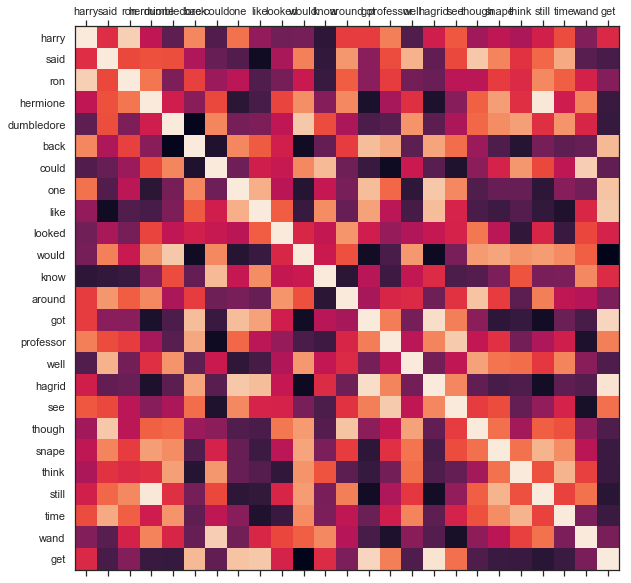

In [210]:
plot_corr(df_corr)

In [211]:
def plot_corr_seaborn(corr):
    # Source: https://seaborn.pydata.org/examples/many_pairwise_correlations.html
    
    from string import ascii_letters
    import numpy as np
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt

    sns.set(style="white")
    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    plot = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.2, cbar_kws={"shrink": .5})

    #plot.set_xlabel("X Label",fontsize=30)
    #plot.set_ylabel("Y Label",fontsize=20)

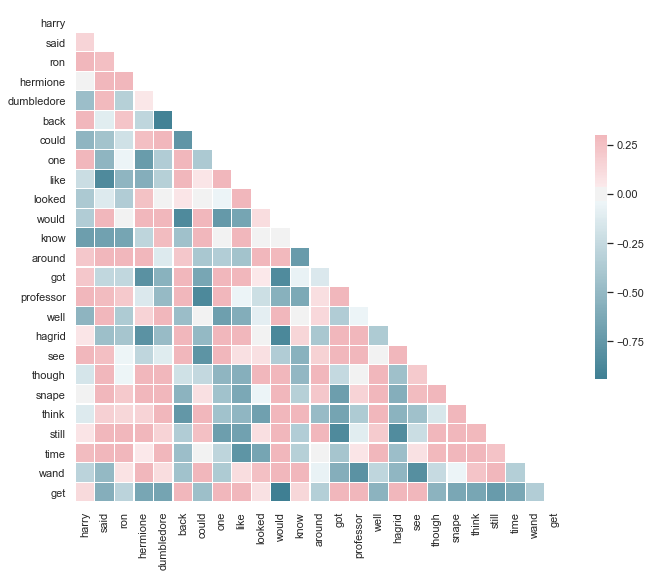

In [213]:
plot_corr_seaborn(df_corr)

In [ ]:
## @TODO: ? Count only the names in 

## Distance matrix

## Clustering

In [214]:
from scipy.spatial.distance import euclidean, pdist, squareform

In [215]:
dist = pd.DataFrame(squareform(pdist(df_result)), columns=df_result.index, index=df_result.index)

In [216]:
dist

fn,Chamber of Secrets.txt,Deathly Hallows.txt,Goblet of Fire.txt,Half-Blood Prince.txt,Order of the Phoenix.txt,Prisoner of Azkaban.txt,Sorcerers Stone.txt
fn,,,,,,,
Chamber of Secrets.txt,0.000000,7.972099,6.429718,7.297217,5.947792,4.940021,8.426511
Deathly Hallows.txt,7.972099,0.000000,7.459504,7.176300,6.941305,8.847704,10.305822
Goblet of Fire.txt,6.429718,7.459504,0.000000,7.335180,4.870326,5.366255,8.605891
Half-Blood Prince.txt,7.297217,7.176300,7.335180,0.000000,5.187402,8.005271,11.025742
Order of the Phoenix.txt,5.947792,6.941305,4.870326,5.187402,0.000000,5.929937,9.461309
Prisoner of Azkaban.txt,4.940021,8.847704,5.366255,8.005271,5.929937,0.000000,8.867232
Sorcerers Stone.txt,8.426511,10.305822,8.605891,11.025742,9.461309,8.867232,0.000000


In [217]:
df_corr_files = df_result.T.corr()
df_corr_files

fn,Chamber of Secrets.txt,Deathly Hallows.txt,Goblet of Fire.txt,Half-Blood Prince.txt,Order of the Phoenix.txt,Prisoner of Azkaban.txt,Sorcerers Stone.txt
fn,,,,,,,
Chamber of Secrets.txt,1.000000,-0.327975,-0.333661,-0.204081,-0.259765,0.337026,-0.051632
Deathly Hallows.txt,-0.327975,1.000000,-0.179138,0.167657,-0.098479,-0.519474,-0.279615
Goblet of Fire.txt,-0.333661,-0.179138,1.000000,-0.297630,0.118908,0.122546,-0.111475
Half-Blood Prince.txt,-0.204081,0.167657,-0.297630,1.000000,0.368216,-0.405754,-0.530923
Order of the Phoenix.txt,-0.259765,-0.098479,0.118908,0.368216,1.000000,-0.120684,-0.520079
Prisoner of Azkaban.txt,0.337026,-0.519474,0.122546,-0.405754,-0.120684,1.000000,-0.082310
Sorcerers Stone.txt,-0.051632,-0.279615,-0.111475,-0.530923,-0.520079,-0.082310,1.000000


In [218]:
1-df_corr_files

fn,Chamber of Secrets.txt,Deathly Hallows.txt,Goblet of Fire.txt,Half-Blood Prince.txt,Order of the Phoenix.txt,Prisoner of Azkaban.txt,Sorcerers Stone.txt
fn,,,,,,,
Chamber of Secrets.txt,0.000000,1.327975,1.333661,1.204081,1.259765,0.662974,1.051632
Deathly Hallows.txt,1.327975,0.000000,1.179138,0.832343,1.098479,1.519474,1.279615
Goblet of Fire.txt,1.333661,1.179138,0.000000,1.297630,0.881092,0.877454,1.111475
Half-Blood Prince.txt,1.204081,0.832343,1.297630,0.000000,0.631784,1.405754,1.530923
Order of the Phoenix.txt,1.259765,1.098479,0.881092,0.631784,0.000000,1.120684,1.520079
Prisoner of Azkaban.txt,0.662974,1.519474,0.877454,1.405754,1.120684,0.000000,1.082310
Sorcerers Stone.txt,1.051632,1.279615,1.111475,1.530923,1.520079,1.082310,0.000000


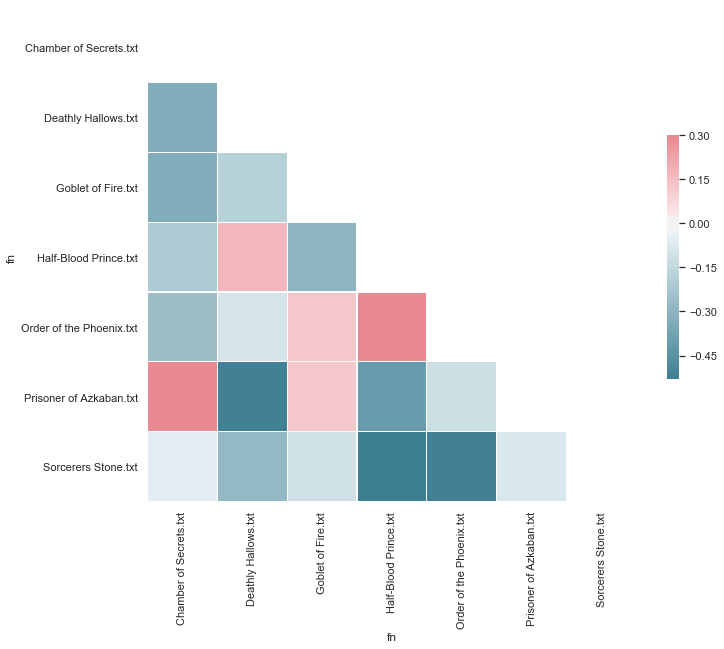

In [219]:
plot_corr_seaborn(df_corr_files)

In [220]:
dist.values

array([[ 0.        ,  7.97209924,  6.42971805,  7.29721741,  5.94779213,
         4.9400208 ,  8.42651066],
       [ 7.97209924,  0.        ,  7.45950446,  7.17630001,  6.94130469,
         8.84770413, 10.30582169],
       [ 6.42971805,  7.45950446,  0.        ,  7.33518035,  4.87032635,
         5.36625501,  8.60589105],
       [ 7.29721741,  7.17630001,  7.33518035,  0.        ,  5.18740224,
         8.0052713 , 11.02574249],
       [ 5.94779213,  6.94130469,  4.87032635,  5.18740224,  0.        ,
         5.92993696,  9.46130863],
       [ 4.9400208 ,  8.84770413,  5.36625501,  8.0052713 ,  5.92993696,
         0.        ,  8.86723215],
       [ 8.42651066, 10.30582169,  8.60589105, 11.02574249,  9.46130863,
         8.86723215,  0.        ]])